**Importing Libraries**

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')
dataset_path = "C:\\Users\\akayr\\Desktop\\archive"


**Book Data**

In [6]:
book_data = pd.read_csv(dataset_path + "\\Books.csv")
book_data.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
book_data.columns = book_data.columns.str.strip().str.lower().str.replace('-', '_')
book_data.head()


,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [7]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271358 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [8]:
book_data.shape

(271360, 5)

**Users Data**

In [9]:
# Load Users Data
users_data = pd.read_csv("C:\\Users\\akayr\\Desktop\\archive\\Users.csv")
users_data.columns = users_data.columns.str.strip().str.lower().str.replace('-', '_')
users_data.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [11]:
users_data.shape

(278858, 3)

**Ratings Data**

In [12]:
# Load Ratings Data
ratings_data = pd.read_csv(dataset_path + "\\Ratings.csv")
ratings_data.columns = ratings_data.columns.str.strip().str.lower().str.replace('-', '_')
ratings_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [13]:
import pandas as pd

# Load datasets
ratings_data = pd.read_csv(dataset_path + "\\ratings.csv")
book_data = pd.read_csv(dataset_path + "\\Books.csv")
users_data = pd.read_csv(dataset_path + "\\users.csv")

# Check for missing values in key columns
if ratings_data['ISBN'].isnull().any() or book_data['ISBN'].isnull().any() or users_data['User-ID'].isnull().any():
    print("Warning: Missing values found in key columns. Handle accordingly.")

# Merge datasets
merged_data = pd.merge(ratings_data, book_data, on='ISBN', how='inner')
merged_data = pd.merge(merged_data, users_data, on='User-ID', how='inner')

# Display the first few rows of the merged dataset
print(merged_data.head())


   User-ID        ISBN  Book-Rating                       Book-Title  \
0   276733  2080674722            0      Les Particules Elementaires   
1   192101  2080674722            7      Les Particules Elementaires   
2   192101  9871138016            0  Cronica De Una Muerte Anunciada   
3   192101  2226070109            0           Un aller simple: Roman   
4   192101  2264010991            0                  Nocturne indien   

              Book-Author Year-Of-Publication       Publisher  \
0      Michel Houellebecq                1998      Flammarion   
1      Michel Houellebecq                1998      Flammarion   
2  Gabriel Marques Garcia                2002      Debols!llo   
3   Didier van Cauwelaert                1994    Albin Michel   
4        Antonio Tabucchi                1988  Editions 10/18   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/2080674722.0...   
1  http://images.amazon.com/images/P/2080674722.0...   
2  http:

In [14]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [15]:
ratings_data.shape

(1149780, 3)

# Data Preparation (Data Cleaning and Feature Engineering)

In [16]:
# Check the current columns of book_data
print(book_data.columns)


Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


In [17]:
# replacing '-' with '_' and features name in lower case
book_data.columns= book_data.columns.str.strip().str.lower().str.replace('-', '_')
users_data.columns= users_data.columns.str.strip().str.lower().str.replace('-', '_')
ratings_data.columns= ratings_data.columns.str.strip().str.lower().str.replace('-', '_')

In [18]:
pd.set_option('display.max_colwidth', None)


In [19]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271358 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
 5   image_url_s          271360 non-null  object
 6   image_url_m          271360 non-null  object
 7   image_url_l          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Let's see null values in book_data.

In [20]:
print(book_data.isnull().sum())

isbn                   0
book_title             0
book_author            2
year_of_publication    0
publisher              2
image_url_s            0
image_url_m            0
image_url_l            3
dtype: int64


In [21]:
# nan values in particular column
book_data.loc[(book_data['book_author'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
118033,751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0751352497.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0751352497.01.LZZZZZZZ.jpg
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


In [22]:
# nan values in particular column
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
128890,1931696566,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [23]:
# getting unique value from 'year_of_publication' feature
book_data['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [24]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
book_data[book_data['year_of_publication'] == 'DK Publishing Inc'] 

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
209538,0789466976,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [25]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title' 
book_data[book_data['year_of_publication'] == 'Gallimard']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


There has to make some correction in three rows as you can see in above output. Let's fix it.

In [26]:
book_data.loc[221678]


isbn                                                                                                                     789466953
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"
book_author                                                                                                                   2000
year_of_publication                                                                                              DK Publishing Inc
publisher                                                             http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg
image_url_s                                                           http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg
image_url_m                                                           http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg
image_url_l                                                                        

In [27]:
book_data.loc[209538]

isbn                                                                                                             0789466976
book_title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
book_author                                                                                                            2000
year_of_publication                                                                                       DK Publishing Inc
publisher                                                      http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
image_url_s                                                    http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg
image_url_m                                                    http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg
image_url_l                                                                                                             NaN
Name: 20

In [28]:
book_data.loc[220731]

isbn                                                                                 2070426769
book_title             Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
book_author                                                                                2003
year_of_publication                                                                   Gallimard
publisher                          http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg
image_url_s                        http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg
image_url_m                        http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg
image_url_l                                                                                 NaN
Name: 220731, dtype: object

Let's fix it and make it in correct format as per our dataset.

In [29]:
# Display the columns in merged_data
print(merged_data.columns)


Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L', 'Location', 'Age'],
      dtype='object')


In [30]:
# Display the columns in both DataFrames
print("Columns in ratings_data:", ratings_data.columns)
print("Columns in merged_data:", merged_data.columns)


Columns in ratings_data: Index(['user_id', 'isbn', 'book_rating'], dtype='object')
Columns in merged_data: Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L', 'Location', 'Age'],
      dtype='object')


In [31]:
# Check for missing values in key columns
if ratings_data['user_id'].isnull().any() or merged_data['User-ID'].isnull().any() or merged_data['ISBN'].isnull().any():
    print("Warning: Missing values found in key columns. Handle accordingly.")

# Merge ratings data with the previously merged dataset (using inner merge by default)
final_data = pd.merge(ratings_data, merged_data, left_on=['user_id', 'isbn'], right_on=['User-ID', 'ISBN'])

# Display the first few rows of the merged dataset
print(final_data.head())


   user_id        isbn  book_rating  User-ID        ISBN  Book-Rating  \
0   276733  2080674722            0   276733  2080674722            0   
1   276747  1570231028            0   276747  1570231028            0   
2   276747  1885408226            7   276747  1885408226            7   
3   276751  3596218098            8   276751  3596218098            8   
4   276762  3404122879            0   276762  3404122879            0   

                                                                                                                                        Book-Title  \
0                                                                                                                      Les Particules Elementaires   
1  Change Your Job, Change Your Life: High Impact Strategies for Finding Great Jobs in the Decade Ahead (Change Your Job Change Your Life, 7th ed)   
2                                                                                                              

In [32]:
# Display the columns in merged_data
print("Columns in merged_data:", merged_data.columns)


Columns in merged_data: Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L', 'Location', 'Age'],
      dtype='object')


In [33]:
# Display the columns in ratings_data
print("Columns in ratings_data:", ratings_data.columns)


Columns in ratings_data: Index(['user_id', 'isbn', 'book_rating'], dtype='object')


In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming you have loaded ratings_data and merged_data

# Make column names consistent
ratings_data.columns = ['user_id', 'isbn', 'book_rating']

# Print the columns in each DataFrame
print("Columns in ratings_data:", ratings_data.columns)
print("Columns in merged_data:", merged_data.columns)

# Merge ratings data with the previously merged dataset
try:
    final_data = pd.merge(ratings_data, merged_data, left_on=['user_id', 'isbn'], right_on=['User-ID', 'ISBN'])
except Exception as e:
    print("Error during merge:", e)

# Identify the columns to drop based on suffixes
columns_to_drop = ['User-ID', 'ISBN']
columns_to_drop += [col for col in final_data.columns if col.endswith(('_x', '_y'))]

# Drop redundant columns
try:
    final_data.drop(columns_to_drop, axis=1, inplace=True)
except Exception as e:
    print("Error during column drop:", e)

# Convert ISBN to a numeric format using LabelEncoder
try:
    isbn_encoder = LabelEncoder()
    final_data['book_id'] = isbn_encoder.fit_transform(final_data['isbn'])
except Exception as e:
    print("Error during ISBN encoding:", e)

# Print the first few rows of the final_data DataFrame
print("First few rows of final_data:")
print(final_data.head())

Columns in ratings_data: Index(['user_id', 'isbn', 'book_rating'], dtype='object')
Columns in merged_data: Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L', 'Location', 'Age'],
      dtype='object')
First few rows of final_data:
   user_id        isbn  book_rating  Book-Rating  \
0   276733  2080674722            0            0   
1   276747  1570231028            0            0   
2   276747  1885408226            7            7   
3   276751  3596218098            8            8   
4   276762  3404122879            0            0   

                                                                                                                                        Book-Title  \
0                                                                                                                      Les Particules Elementaires   
1  Change Your Job, Change Your Life: High 

In [35]:
# function to fix mismatch data in feature 'book_title', 'book_author', ' year_of_publication', 'publisher'
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [36]:
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
128890,1931696566,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [37]:
df = pd.DataFrame(book_data)
cols = [4]
df = df[df.columns[cols]]

In [38]:
pd.set_option('display.max_columns', None)  
df.head(5)

,publisher
0,Oxford University Press
1,HarperFlamingo Canada
2,HarperPerennial
3,Farrar Straus Giroux
4,W. W. Norton &amp; Company


In [39]:
book_data[book_data['publisher'] == 'No Mention']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l


## Let's see now user_data dataset

In [40]:
# users_data size
print(users_data.shape)

(278858, 3)


In [41]:
# unique value in age
users_data['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [42]:
# replacing nan with average of 'age'
users_data['age'].fillna((users_data['age'].mean()), inplace=True)

In [43]:
users_data['age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

In [44]:
# retrieving age data between 5 to 90
users_data.loc[(users_data['age'] > 90) | (users_data['age'] < 5)] = np.nan

In [45]:
users_data['age'].fillna((users_data['age'].mean()), inplace=True)

In [46]:
users_data['age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

## Now let's take ratings_data dataset

In [47]:
ratings_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [48]:
# finding unique ISBNs from rating and book dataset
unique_ratings = ratings_data[ratings_data.isbn.isin(book_data.isbn)]
unique_ratings

,user_id,isbn,book_rating
5,276733,2080674722,0
22,276747,1570231028,0
23,276747,1885408226,7
27,276751,3596218098,8
37,276762,3404122879,0
...,...,...,...
1149651,276681,1931333246,10
1149746,276688,1551669315,6
1149747,276688,1575660792,7
1149748,276688,1580600506,0


In [49]:
print(ratings_data.shape)
print(unique_ratings.shape)

(1149780, 3)
(112107, 3)


In [50]:
# unique ratings from 'book_rating' feature
unique_ratings['book_rating'].unique()

array([ 0,  7,  8, 10,  9,  6,  1,  3,  5,  4,  2], dtype=int64)

# Data Visualizations

## Book_data dataset

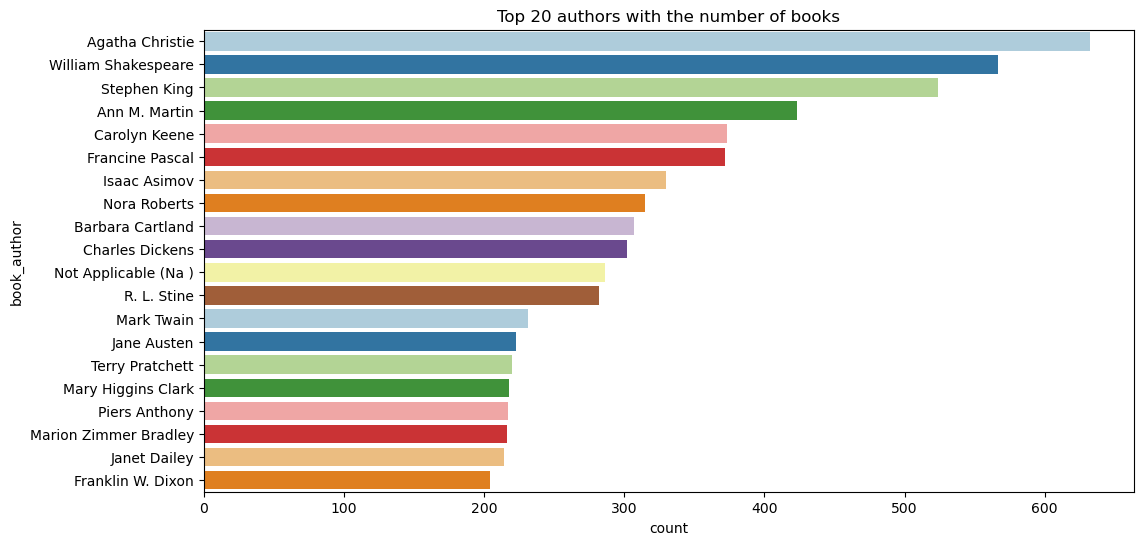

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y="book_author", palette='Paired', data=book_data, order=book_data['book_author'].value_counts().index[0:20])
plt.title("Top 20 authors with the number of books")
plt.show()


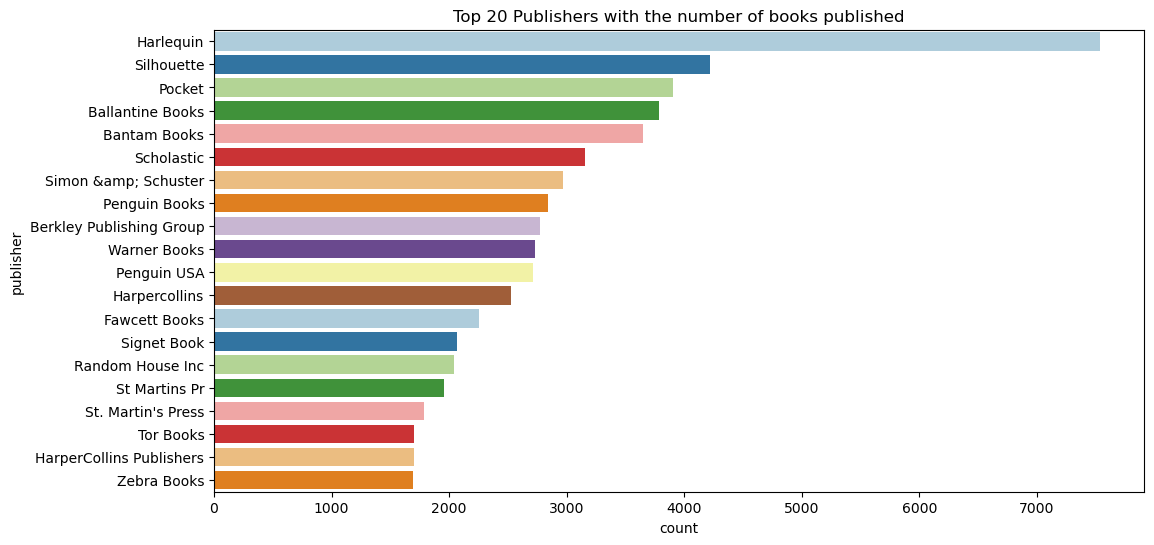

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y="publisher", palette='Paired', data=book_data, order=book_data['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with the number of books published")
plt.show()


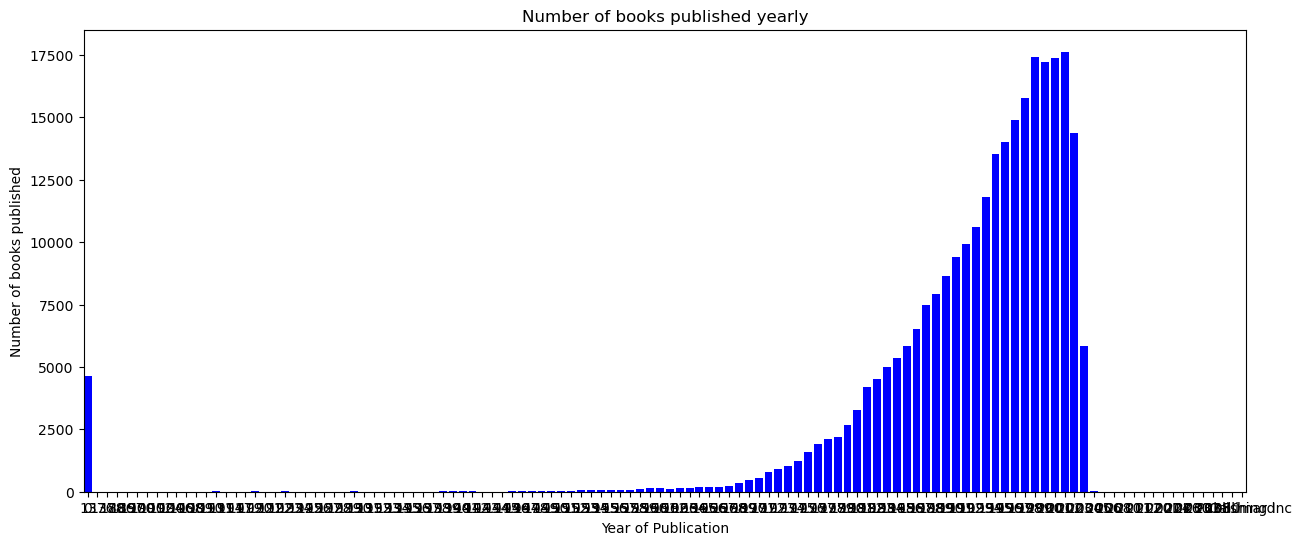

In [53]:
import matplotlib.pyplot as plt

publications = {}
for year in book_data['year_of_publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] += 1

publications = {k: v for k, v in sorted(publications.items())}

fig = plt.figure(figsize=(15, 6))
plt.bar(list(publications.keys()), list(publications.values()), color='blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x=0)
plt.show()


In [54]:
book_data.year_of_publication = pd.to_numeric(book_data.year_of_publication, errors='coerce')

# Checking for 0's or NaNs in Year of Publication
zero_year = book_data[book_data.year_of_publication == 0].year_of_publication.count()
nan_year = book_data.year_of_publication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
book_data.year_of_publication.replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 3 NaN entries in the Year of Publication field


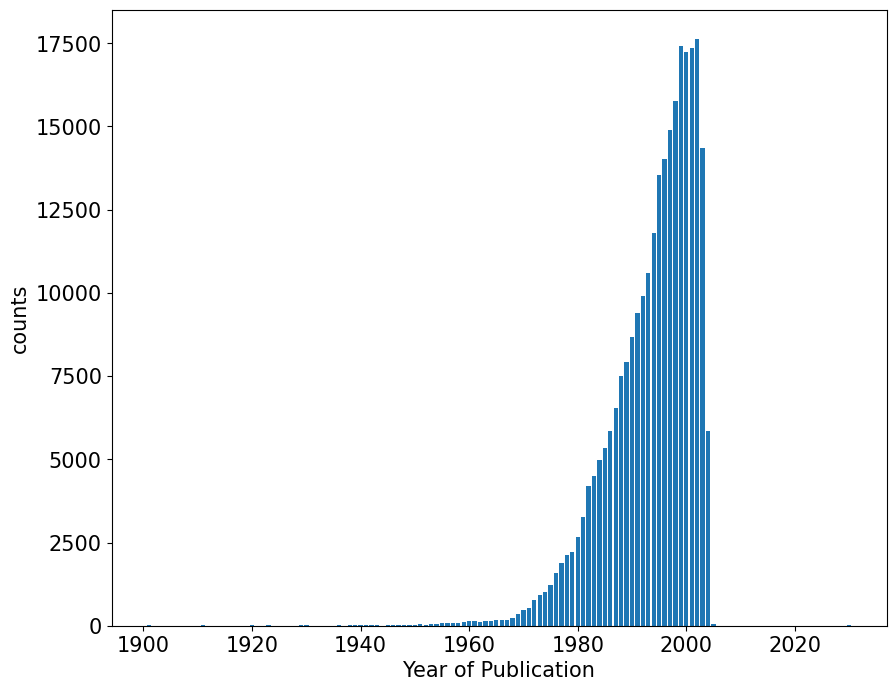

In [55]:
year = book_data.year_of_publication.value_counts().sort_index()
year = year.where(year>5) 
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) 
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

## User_data Dataset

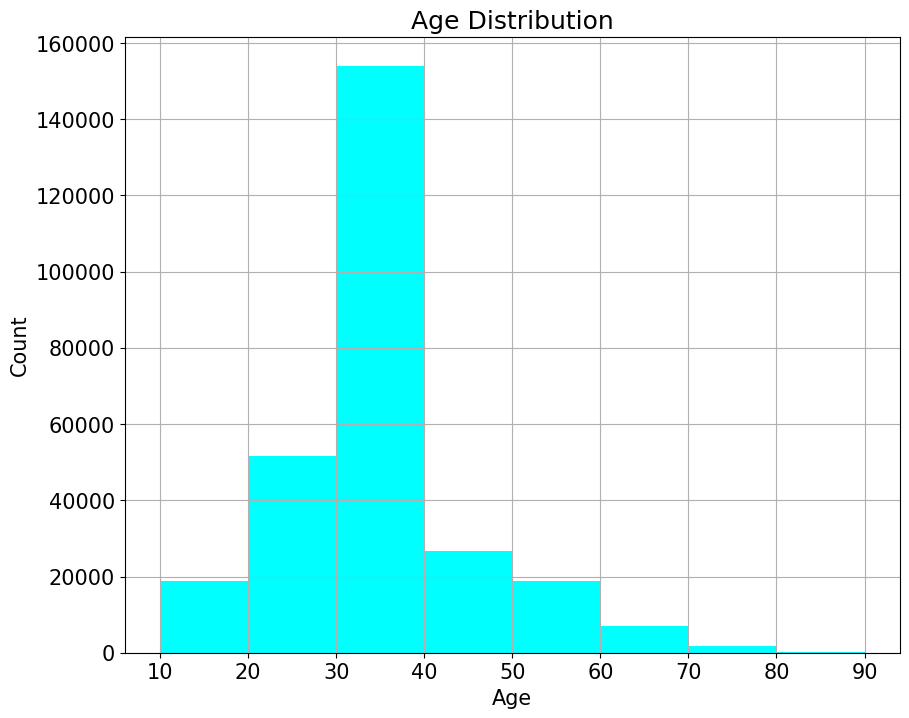

In [56]:
plt.figure(figsize=(10,8))
users_data.age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Ratings_data Dataset

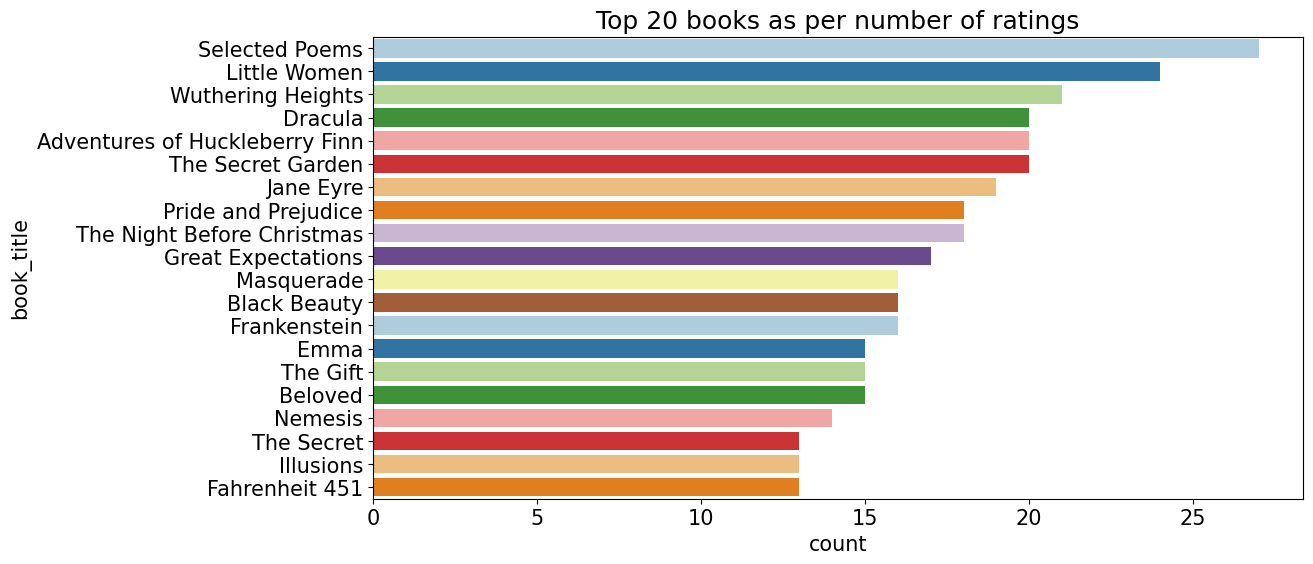

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_title", palette='Paired', data=book_data, order=book_data['book_title'].value_counts().index[0:20])
plt.title("Top 20 books as per number of ratings")
plt.show()


<Axes: xlabel='book_rating', ylabel='count'>

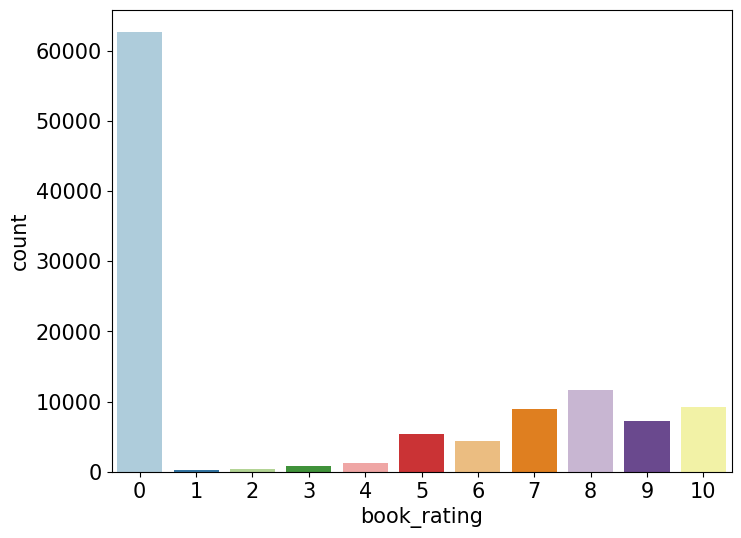

In [58]:
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating",palette = 'Paired',data= unique_ratings)

Text(0.5, 1.0, 'Explicit Ratings')

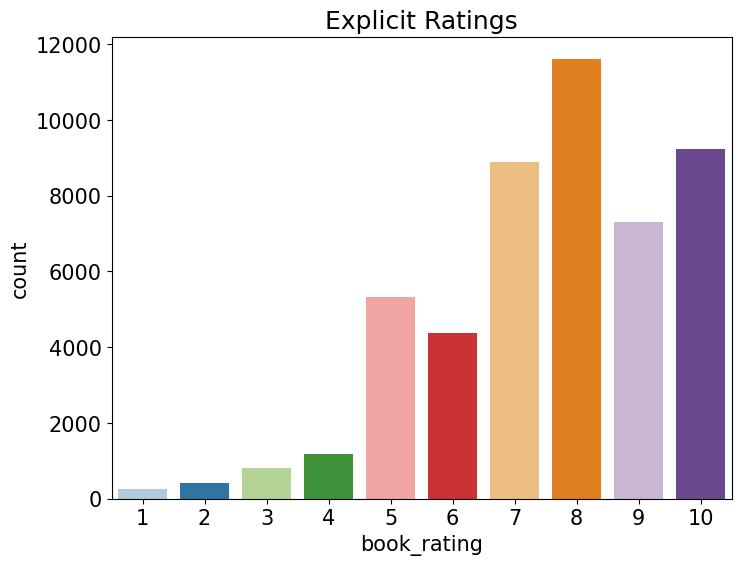

In [59]:
# Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book_rating'] != 0]
sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

# Recommendation System

In [60]:
ratings_explicit= unique_ratings[unique_ratings['book_rating'] != 0]   # explicit ratings represented by 1–10
ratings_implicit= unique_ratings[unique_ratings['book_rating'] == 0]   # implicit ratings represented by 0

In [61]:
ratings_explicit.head()

,user_id,isbn,book_rating
23,276747,1885408226,7
27,276751,3596218098,8
44,276762,3453092007,8
61,276772,3499230933,10
62,276772,3596151465,10


In [62]:
print(unique_ratings.shape)
print(ratings_explicit.shape)

(112107, 3)
(49409, 3)


In [63]:
# Merging book_data dataset and ratings_explicit
new_book_df= pd.merge(book_data, ratings_explicit, on='isbn')
new_book_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating
0,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,http://images.amazon.com/images/P/1552041778.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1552041778.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1552041778.01.LZZZZZZZ.jpg,8,5
1,1558746218,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),Jack Canfield,1998.0,Health Communications,http://images.amazon.com/images/P/1558746218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1558746218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1558746218.01.LZZZZZZZ.jpg,61501,7
2,1558746218,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),Jack Canfield,1998.0,Health Communications,http://images.amazon.com/images/P/1558746218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1558746218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1558746218.01.LZZZZZZZ.jpg,148514,10
3,1558746218,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),Jack Canfield,1998.0,Health Communications,http://images.amazon.com/images/P/1558746218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1558746218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1558746218.01.LZZZZZZZ.jpg,263256,10
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1567407781.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1567407781.01.LZZZZZZZ.jpg,8,6


In [64]:
print(new_book_df.shape)

(49409, 10)


In [65]:
new_book_df['book_title'].count()

49409

In [66]:
new_book_df['book_title'].nunique()

28698

## Let's take top 10 recommendation books

In [67]:
import pandas as pd
import numpy as np  # If not already imported

# top ten books as per book ratings and recommendation
top_ten_books = pd.DataFrame(new_book_df.groupby('book_title')['book_rating'].count()
                             .sort_values(ascending=False).head(10)).reset_index()

print('The top ten books as per ratings:')
print(top_ten_books)


The top ten books as per ratings:
                                                                     book_title  \
0                  The No. 1 Ladies' Detective Agency (Today Show Book Club #8)   
1                                                                How to Be Good   
2                         A Child Called \It\": One Child's Courage to Survive"   
3                 The Color of Water: A Black Man's Tribute to His White Mother   
4                                                                 High Fidelity   
5                           Tears of the Giraffe (No.1 Ladies Detective Agency)   
6                                                                   About a Boy   
7                The Lost Boy: A Foster Child's Search for the Love of a Family   
8  Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series (Paper))   
9                    The Four Agreements: A Practical Guide to Personal Freedom   

   book_rating  
0          183  
1          149  
2

## Train - Test Split

In [68]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(new_book_df, test_size=0.20)

In [69]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 39527
Testing set lengths: 9882
Test set is 20% of the full dataset.


In [70]:
# Get int mapping for user_id in train dataset
u_unique_train = train_data.user_id.unique()  
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

# Get int mapping for isbn in train dataset
i_unique_train = train_data.isbn.unique()  
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

In [71]:
# Get int mapping for user_id in test dataset
u_unique_test = test_data.user_id.unique()  
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

# Get int mapping for isbn in test dataset
i_unique_test = test_data.isbn.unique() 
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}

In [72]:
# training set
train_data['u_unique'] = train_data['user_id'].map(train_data_user2idx)
train_data['i_unique'] = train_data['isbn'].map(train_data_book2idx)

# testing set
test_data['u_unique'] = test_data['user_id'].map(test_data_user2idx)
test_data['i_unique'] = test_data['isbn'].map(test_data_book2idx)

# Convert back to three feature of dataframe 
train_data = train_data[['u_unique', 'i_unique', 'book_rating']]
test_data = test_data[['u_unique', 'i_unique', 'book_rating']]

In [73]:
train_data.sample(5)

,u_unique,i_unique,book_rating
20012,37,20047,6
18222,530,580,5
11441,141,20795,6
23702,662,14198,9
17046,4808,6379,5


In [74]:
test_data.sample(5)

,u_unique,i_unique,book_rating
31052,53,2455,7
2606,3333,267,3
39883,289,306,10
12121,4468,5856,10
47863,1181,7454,8


## User-Item for Train Data

In [75]:
from scipy.sparse import coo_matrix

# Create a sparse matrix
train_matrix = coo_matrix((train_data['book_rating'].astype(float), (train_data['u_unique'], train_data['i_unique'])))

# Check the shape of the sparse matrix
print(train_matrix.shape)


(15588, 24970)


## User-Item for Test Data

In [76]:
n_users = test_data['u_unique'].nunique()
n_books = test_data['i_unique'].nunique()

test_matrix = np.zeros((n_users, n_books))

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3] 

In [77]:
test_matrix.shape

(5825, 8019)

## Cosine Similarity Based Recommendation System

In [78]:
from sklearn.metrics.pairwise import pairwise_distances
from scipy.sparse import coo_matrix

# Assuming train_matrix is a coo_matrix
train_matrix_csc = train_matrix.tocsc()

# Take a smaller subset of the matrix
train_matrix_small = train_matrix_csc[:5000, :5000]
test_matrix_small = test_matrix[:5000, :5000]

# Compute user-user and item-item similarities
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine')


In [79]:
from scipy.sparse import coo_matrix
import numpy as np

def predict_books(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = np.array(ratings.mean(axis=1)).flatten()
        
        # Use np.newaxis so that mean_user_rating has the same format as ratings
        ratings_diff = ratings - mean_user_rating[:, np.newaxis]
        
        # Ensure ratings_diff is a dense matrix for the dot product
        ratings_diff_dense = ratings_diff.A if coo_matrix else ratings_diff
        
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff_dense) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred



In [80]:
item_prediction = predict_books(train_matrix_small, item_similarity, type='item')
user_prediction = predict_books(train_matrix_small, user_similarity, type='user')

## Evaluation Metric

In [81]:
# Evaluation metric by mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, test_matrix))

print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')

Item-based CF RMSE: 7.817845350115422
User-based CF RMSE: 7.8175878292631875


## Train - Test Split

In [82]:
from tensorflow.keras.models import load_model

# Load the pre-trained model
model = load_model("C:\\Users\\akayr\\Desktop\\gnn_model_trained.h5")

# Assuming 'test_data' has the necessary features for prediction
user_inputs = test_data['u_unique'].values
book_inputs = test_data['i_unique'].values

# Predict using the loaded model
predictions = model.predict([user_inputs, book_inputs])

# Now you can use 'predictions'
print(len(test_data['book_rating']), len(predictions.flatten()))




309/309 [==============================] - 0s 879us/step
9882 9882


In [83]:
# Flatten the predictions
flat_predictions = predictions.flatten()

# Print the flattened predictions
print(flat_predictions)


[2.8221688 3.9698982 2.7493181 ... 2.2343507 3.8879635 5.504644 ]


In [84]:
# Ensure both true ratings and predictions are 1D arrays
y_true = test_data['book_rating'].values.flatten()

# Get the indices of the test data within the bounds of predictions
indices_within_bounds = test_data.index[test_data.index < len(predictions)]

# Align predictions based on indices within bounds
aligned_predictions = np.zeros(len(y_true))
aligned_predictions[indices_within_bounds] = predictions.flatten()[:len(indices_within_bounds)]

# Ensure the lengths match before computing RMSE
if len(y_true) == len(aligned_predictions):
    # Now compute RMSE
    rmse = np.sqrt(mean_squared_error(y_true, aligned_predictions))
    print(f'RMSE: {rmse}')
else:
    print("Lengths of true ratings and predictions do not match.")


RMSE: 7.241605625611659


In [85]:
# Assuming you have TensorFlow with GPU support installed
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dot, Add, Dense, Concatenate, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load data
dataset_path = r"C:\Users\akayr\Desktop\archive"

book_data = pd.read_csv(dataset_path + "\\Books.csv")
rating_data = pd.read_csv(dataset_path + "\\Ratings.csv")  # Updated file name
users_data = pd.read_csv(dataset_path + "\\Users.csv")    

# Assuming 'user_id', 'book_id', and 'rating' are the columns in your rating_data
# Assuming the actual column names are 'User-ID', 'ISBN', and 'Book-Rating'
ratings = rating_data.rename(columns={'User-ID': 'user', 'ISBN': 'item', 'Book-Rating': 'rating'})

# Create user and item indices
user_ids = ratings['user'].unique()
book_ids = ratings['item'].unique()

user_id_map = {id: idx for idx, id in enumerate(user_ids)}
book_id_map = {id: idx for idx, id in enumerate(book_ids)}

num_users = len(user_ids)
num_books = len(book_ids)

# Map user and book IDs to indices
ratings['user'] = ratings['user'].map(user_id_map)
ratings['item'] = ratings['item'].map(book_id_map)

# Train-test split
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

# Ensure that user and item indices in the test set are present in the training set
test_data = test_data[test_data['user'].isin(train_data['user']) & test_data['item'].isin(train_data['item'])]

# Keras model for collaborative filtering with optimizations
embedding_dim = 50

# User input
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim)(user_input)
user_embedding = Flatten()(user_embedding)

# Book input
book_input = Input(shape=(1,), name='book_input')
book_embedding = Embedding(input_dim=num_books, output_dim=embedding_dim)(book_input)
book_embedding = Flatten()(book_embedding)

# Dot product of user and book embeddings
dot_product = Dot(axes=1)([user_embedding, book_embedding])

# Adding bias terms
user_bias = Embedding(input_dim=num_users, output_dim=1)(user_input)
user_bias = Flatten()(user_bias)

book_bias = Embedding(input_dim=num_books, output_dim=1)(book_input)
book_bias = Flatten()(book_bias)

# Concatenate embeddings and add neural layer with optimizations
concatenated = Concatenate()([user_embedding, book_embedding])
neural_layer = Dense(64, activation='relu')(concatenated)
neural_layer = Dropout(0.2)(neural_layer)  # Adjust dropout rate
neural_layer = BatchNormalization()(neural_layer)

# Final prediction
prediction = Add()([dot_product, user_bias, book_bias, neural_layer])

# Create and compile the model with a lower learning rate
model = Model(inputs=[user_input, book_input], outputs=prediction)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit([train_data['user'], train_data['item']], train_data['rating'], epochs=5, batch_size=512, validation_data=([test_data['user'], test_data['item']], test_data['rating']), callbacks=[early_stopping])


Epoch 1/5

1797/1797 [==============================] - 231s 128ms/step - loss: 21.7978 - val_loss: 18.7343
Epoch 2/5
1797/1797 [==============================] - 232s 129ms/step - loss: 19.0607 - val_loss: 17.4031
Epoch 3/5
1797/1797 [==============================] - 231s 128ms/step - loss: 17.1182 - val_loss: 16.4272
Epoch 4/5
1797/1797 [==============================] - 231s 129ms/step - loss: 15.3855 - val_loss: 15.7333
Epoch 5/5
1797/1797 [==============================] - 231s 129ms/step - loss: 13.9558 - val_loss: 15.1383


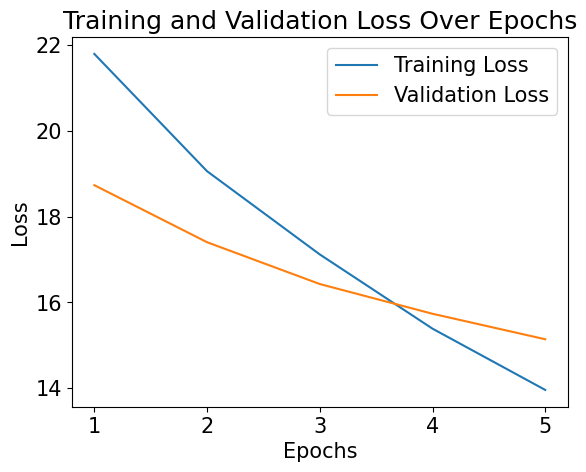

In [122]:
import matplotlib.pyplot as plt

# Provided loss values
training_loss = [21.7978, 19.0607, 17.1182, 15.3855, 13.9558]
validation_loss = [18.7343, 17.4031, 16.4272, 15.7333, 15.1383]

# Plot training and validation loss
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [87]:
# Evaluate the model on the test data
test_loss = model.evaluate([test_data['user'], test_data['item']], test_data['rating'])
print(f'Test Loss: {test_loss}')

# Predictions on the test set
predictions = model.predict([test_data['user'], test_data['item']])

# Debugging
print("Shape of test_data['rating']: ", test_data['rating'].shape)
print("Shape of predictions.flatten(): ", predictions.flatten().shape)


5454/5454 [==============================] - 5s 829us/step - loss: 15.1383
Test Loss: 15.138330459594727
5454/5454 [==============================] - 4s 797us/step
Shape of test_data['rating']:  (174503,)
Shape of predictions.flatten():  (11168192,)


In [88]:
# Debugging
print("Unique users in test_data: ", test_data['user'].nunique())
print("Unique items in test_data: ", test_data['item'].nunique())
print("Unique values in predictions: ", len(np.unique(predictions.flatten())))

# Print samples from test_data along with corresponding predictions
print(test_data[['user', 'item', 'rating']].head(10))
print("Predictions for the same samples: ", predictions.flatten()[:10])


Unique users in test_data:  26513
Unique items in test_data:  73583
Unique values in predictions:  10012747
          user    item  rating
178554   15560   99291       0
533905   49582   59185       8
1091374  99796  121427       0
130089   12143   78826       0
60190     5186    3329       6
785993   72379  148175       0
66929     5776   17350       6
405917   38206   71708       8
14903     1641   13237       0
449812   41711  189973       6
Predictions for the same samples:  [-0.04646851 -0.06039776 -0.05149908 -0.058513   -0.05341746 -0.03152202
 -0.05339624 -0.06001861 -0.04493208 -0.053104  ]


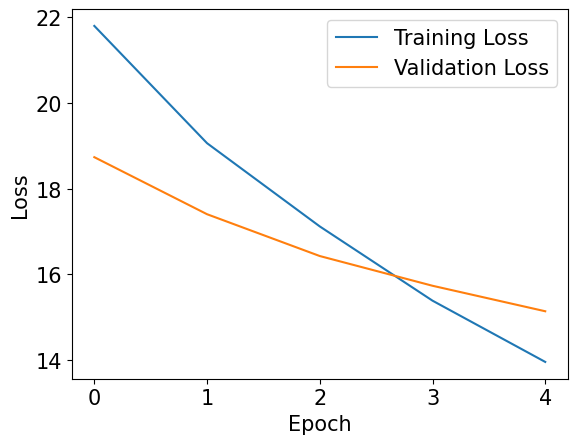

In [89]:
# Plot training loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [90]:
print("Shape of predictions array:", predictions.shape)

Shape of predictions array: (174503, 64)


In [91]:
# Evaluate the model
num_samples = len(predictions)
test_samples = test_data.sample(num_samples, random_state=42)
test_samples = test_samples.head(num_samples)  # Ensure the same number of samples
rmse = np.sqrt(mean_squared_error(test_samples['rating'], predictions[:, 0]))
print(f'RMSE: {rmse}')


RMSE: 4.397055935947479


In [92]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
dataset_path = r"C:\Users\akayr\Desktop\archive"
ratings_data = pd.read_csv(dataset_path + "\\Ratings.csv")

# Assuming 'User-ID', 'ISBN', and 'Book-Rating' are the columns in your ratings_data
user_encoder = LabelEncoder()
book_encoder = LabelEncoder()

ratings_data['user_encoded'] = user_encoder.fit_transform(ratings_data['User-ID'])
ratings_data['book_encoded'] = book_encoder.fit_transform(ratings_data['ISBN'])

# Split the data into training and testing sets
train_data, test_data = train_test_split(ratings_data, test_size=0.2, random_state=42)

# Display the first few rows of the encoded dataset
print(train_data.head())
print(test_data.head())


         User-ID        ISBN  Book-Rating  user_encoded  book_encoded
686565    167349  0446611239            0         63068        108387
62456      12576  0140105832            0          4516         21407
1122931   269566  0394540654            7        101831         86132
636841    153662  0803754051            5         58113        202013
878589    212898  0373093764            0         80185         60802
         User-ID        ISBN  Book-Rating  user_encoded  book_encoded
178554     38781  0373259131            0         14710         66197
533905    128835  0811805905            8         48732        207194
1091374   261829  037324486X            0         98946         65482
1036247   247747  0531303306            0         93459        128975
309523     74076  0316812404            0         28004         47683


# CNN MODEL

In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Embedding, Conv1D, Flatten, Dense, Dropout, Input, Concatenate, Reshape
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Load data
dataset_path = r"C:\Users\akayr\Desktop\archive"

book_data = pd.read_csv(dataset_path + "\\Books.csv")
rating_data = pd.read_csv(dataset_path + "\\Ratings.csv")  # Updated file name
users_data = pd.read_csv(dataset_path + "\\Users.csv")    

# Assuming 'user_id', 'book_id', and 'rating' are the columns in your rating_data
# Assuming the actual column names are 'User-ID', 'ISBN', and 'Book-Rating'
ratings = rating_data.rename(columns={'User-ID': 'user', 'ISBN': 'item', 'Book-Rating': 'rating'})

# Create user and item indices
user_ids = ratings['user'].unique()
book_ids = ratings['item'].unique()

user_id_map = {id: idx for idx, id in enumerate(user_ids)}
book_id_map = {id: idx for idx, id in enumerate(book_ids)}

num_users = len(user_ids)
num_books = len(book_ids)

# Map user and book IDs to indices
ratings['user'] = ratings['user'].map(user_id_map)
ratings['item'] = ratings['item'].map(book_id_map)

# Train-test split
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

# Keras model for collaborative filtering with CNN
embedding_dim = 50

# User input
user_input = Input(shape=(1,))
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, input_length=1)(user_input)

# Item input
item_input = Input(shape=(1,))
item_embedding = Embedding(input_dim=num_books, output_dim=embedding_dim, input_length=1)(item_input)

# Concatenate embeddings
merged = Concatenate()([user_embedding, item_embedding])

# Flatten layer
flat_layer = Flatten()(merged)

# Reshape for Conv1D layer
reshaped = Reshape((2 * embedding_dim, 1))(flat_layer)

# 1D convolutional layer
conv_layer = Conv1D(64, 3, activation='relu')(reshaped)

# Flatten layer
flat_layer = Flatten()(conv_layer)

# Dense layers with dropout
dense_layer = Dense(128, activation='relu')(flat_layer)
dropout_layer = Dropout(0.5)(dense_layer)  # Example dropout layer
dense_layer = Dense(64, activation='relu')(dropout_layer)

# Output layer
output_layer = Dense(1, activation='linear')(dense_layer)

# Create and compile the model
model = Model(inputs=[user_input, item_input], outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit([train_data['user'], train_data['item']], train_data['rating'], epochs=5, batch_size=640, validation_data=([test_data['user'], test_data['item']], test_data['rating']))

# Evaluate the model
predictions = model.predict([test_data['user'], test_data['item']])
rmse = np.sqrt(mean_squared_error(test_data['rating'], predictions.flatten()))
print(f'RMSE: {rmse}')


Epoch 1/5
1438/1438 [==============================] - 207s 143ms/step - loss: 11.9628 - val_loss: 11.8130
Epoch 2/5
1438/1438 [==============================] - 205s 143ms/step - loss: 9.7543 - val_loss: 13.1649
Epoch 3/5
1438/1438 [==============================] - 206s 143ms/step - loss: 7.7324 - val_loss: 12.9943
Epoch 4/5
1438/1438 [==============================] - 206s 143ms/step - loss: 6.5011 - val_loss: 13.2352
Epoch 5/5
7187/7187 [==============================] - 10s 1ms/step
RMSE: 3.653318586108951


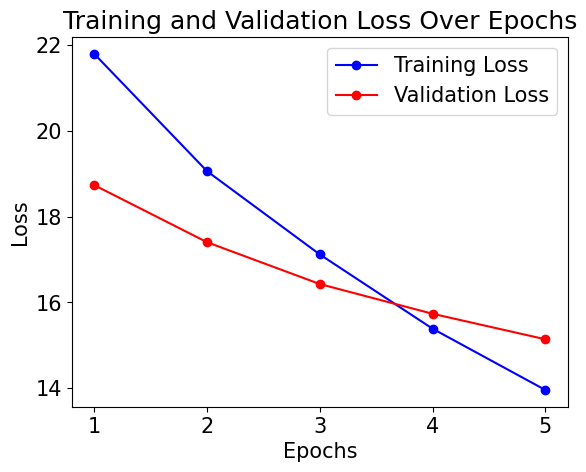

In [96]:
import matplotlib.pyplot as plt

# Assuming 'history' contains the training history with loss values
epochs = range(1, len(history.history['loss']) + 1)

# Plot training and validation loss
plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [97]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Assuming you have user and item indices as num_users and num_books
num_users = 10000
num_books = 50000
embedding_dim = 50

# Define the model
model = Sequential()
model.add(Embedding(input_dim=num_users, output_dim=embedding_dim, input_length=1))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))  # Adjust the number of units and dropout if needed
model.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression

# Compile the model with metrics appropriate for your task
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 1, 50)             500000    
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 529505 (2.02 MB)
Trainable params: 529505 (2.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load your raw dataset
# Replace 'your_raw_dataset.csv' with the actual path to your raw CSV file
raw_df = pd.read_csv(dataset_path + "\\Ratings.csv")

# Encode users and books
user_encoder = LabelEncoder()
book_encoder = LabelEncoder()

raw_df['user_encoded'] = user_encoder.fit_transform(raw_df['User-ID'])
raw_df['book_encoded'] = book_encoder.fit_transform(raw_df['ISBN'])

# Create a DataFrame with 'user_encoded,' 'book_encoded,' and 'Book-Rating'
df = raw_df[['user_encoded', 'book_encoded', 'Book-Rating']]

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Separate features and target variable
X_train = [train_data['user_encoded'], train_data['book_encoded']]
y_train = train_data['Book-Rating']

X_test = [test_data['user_encoded'], test_data['book_encoded']]
y_test = test_data['Book-Rating']


In [99]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

# Model architecture
embedding_dim = 50  # you can adjust this value based on your dataset and experiment
num_users = len(user_encoder.classes_)
num_books = len(book_encoder.classes_)
input_length = 50  # Adjust this based on your dataset

model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=num_users, output_dim=embedding_dim, input_length=input_length))
model_cnn.add(Conv1D(32, 3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))  # Add MaxPooling layer
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(1, activation='linear'))

# Compile the model
model_cnn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])


In [100]:
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, concatenate, Dense, Flatten, Dropout, Conv1D, BatchNormalization
from keras.optimizers import Adam

# Define the RNN model
embedding_dim_rnn = 50
input_length_rnn = 1

input_user_rnn = Input(shape=(1,))
input_book_rnn = Input(shape=(1,))
embedding_user_rnn = Embedding(input_dim=num_users, output_dim=embedding_dim_rnn, input_length=input_length_rnn)(input_user_rnn)
embedding_book_rnn = Embedding(input_dim=num_books, output_dim=embedding_dim_rnn, input_length=input_length_rnn)(input_book_rnn)
lstm_user = LSTM(50, dropout=0.2, recurrent_dropout=0.2)(embedding_user_rnn)
lstm_book = LSTM(50, dropout=0.2, recurrent_dropout=0.2)(embedding_book_rnn)

# Concatenate the outputs of the LSTM layers
merged_rnn_output = concatenate([lstm_user, lstm_book])
# Adding Batch Normalization
merged_rnn_output = BatchNormalization()(merged_rnn_output)

# Add more layers as needed
dense_layer_rnn = Dense(128, activation='relu')(merged_rnn_output)
# Adding Dropout for regularization
dense_layer_rnn = Dropout(0.5)(dense_layer_rnn)
final_output_rnn = Dense(1, activation='linear')(dense_layer_rnn)

# Create the RNN model
model_rnn = Model(inputs=[input_user_rnn, input_book_rnn], outputs=final_output_rnn)

# Compile the RNN model
model_rnn.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mean_squared_error'])

# Define the CNN model
embedding_dim_cnn = 50
input_length_cnn = 50  # Increase the input_length_cnn

input_user_cnn = Input(shape=(input_length_cnn,))
input_book_cnn = Input(shape=(input_length_cnn,))
embedding_user_cnn = Embedding(input_dim=num_users, output_dim=embedding_dim_cnn, input_length=input_length_cnn)(input_user_cnn)
embedding_book_cnn = Embedding(input_dim=num_books, output_dim=embedding_dim_cnn, input_length=input_length_cnn)(input_book_cnn)
conv_user = Conv1D(32, 3, activation='relu')(embedding_user_cnn)
conv_book = Conv1D(32, 3, activation='relu')(embedding_book_cnn)


# Flatten the outputs of the Conv1D layers
flat_user = Flatten()(conv_user)
flat_book = Flatten()(conv_book)

# Concatenate the flattened outputs of the CNN layers
merged_cnn_output = concatenate([flat_user, flat_book])
# Adding Batch Normalization
merged_cnn_output = BatchNormalization()(merged_cnn_output)

# Add more layers as needed
dense_layer_cnn = Dense(128, activation='relu')(merged_cnn_output)
# Adding Dropout for regularization
dense_layer_cnn = Dropout(0.5)(dense_layer_cnn)
final_output_cnn = Dense(1, activation='linear')(dense_layer_cnn)

# Create the CNN model
model_cnn = Model(inputs=[input_user_cnn, input_book_cnn], outputs=final_output_cnn)

# Compile the CNN model
model_cnn.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mean_squared_error'])

# Create the hybrid model by combining the RNN and CNN models
input_user_hybrid = Input(shape=(input_length_cnn,))
input_book_hybrid = Input(shape=(input_length_cnn,))
output_rnn = model_rnn([input_user_hybrid, input_book_hybrid])
output_cnn = model_cnn([input_user_hybrid, input_book_hybrid])

# Flatten the outputs before concatenating
output_rnn_flat = Flatten()(output_rnn)
output_cnn_flat = Flatten()(output_cnn)

# Concatenate the flattened outputs of the RNN and CNN models
merged_output = concatenate([output_rnn_flat, output_cnn_flat])
# Adding Batch Normalization
merged_output = BatchNormalization()(merged_output)

# Add additional layers as needed
dense_layer_hybrid = Dense(128, activation='relu')(merged_output)
# Adding Dropout for regularization
dense_layer_hybrid = Dropout(0.5)(dense_layer_hybrid)
final_output_hybrid = Dense(1, activation='linear')(dense_layer_hybrid)

# Create the hybrid model
model_hybrid = Model(inputs=[input_user_hybrid, input_book_hybrid], outputs=final_output_hybrid)

# Compile the hybrid model
model_hybrid.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mean_squared_error'])


In [101]:
raw_df

,User-ID,ISBN,Book-Rating,user_encoded,book_encoded
0,276725,034545104X,0,104433,57188
1,276726,0155061224,5,104434,29750
2,276727,0446520802,0,104435,107392
3,276729,052165615X,3,104436,127253
4,276729,0521795028,6,104436,127287
...,...,...,...,...,...
1149775,276704,1563526298,9,104428,256876
1149776,276706,0679447156,0,104429,164861
1149777,276709,0515107662,10,104430,123711
1149778,276721,0590442449,10,104431,145625


In [102]:
print("X_train structure:", type(X_train), len(X_train), type(X_train[0]), X_train[0].shape if len(X_train) > 0 else None)
print("X_test structure:", type(X_test), len(X_test), type(X_test[0]), X_test[0].shape if len(X_test) > 0 else None)

X_train structure: <class 'list'> 2 <class 'pandas.core.series.Series'> (919824,)
X_test structure: <class 'list'> 2 <class 'pandas.core.series.Series'> (229956,)


BUILDING HYBRID MODEL

In [111]:
from tensorflow.keras.layers import GlobalMaxPooling1D, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, concatenate, Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your raw dataset
dataset_path = "C:\\Users\\akayr\\Desktop\\archive"
raw_df = pd.read_csv(dataset_path + "\\Ratings.csv")

# Encode users and books
user_encoder = LabelEncoder()
book_encoder = LabelEncoder()

raw_df['user_encoded'] = user_encoder.fit_transform(raw_df['User-ID'])
raw_df['book_encoded'] = book_encoder.fit_transform(raw_df['ISBN'])

# Create a DataFrame with 'user_encoded,' 'book_encoded,' and 'Book-Rating'
df = raw_df[['user_encoded', 'book_encoded', 'Book-Rating']]

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Model architecture
embedding_dim = 50
input_length = 50

# Ensure that the number of unique users and books in the training data is within the expected range
num_users = 1048576  # Replace with the actual number of unique users
num_books = len(book_encoder.classes_)  # Use the actual number of unique books from your dataset

print(f"Number of unique books: {num_books}")

# Update the upper limit for the number of unique books if needed
assert num_users <= 1048576, "Number of unique users in training data exceeds the expected range"
assert num_books <= 340556, "Number of unique books in training data exceeds the expected range"  # Update the upper limit if needed
unique_test_books = test_data['book_encoded'].unique()
print(f"Number of unique books in test data: {len(unique_test_books)}")
print(f"Min book index in test data: {min(unique_test_books)}")
print(f"Max book index in test data: {max(unique_test_books)}")

# CNN model for user
model_cnn_user = Sequential()
model_cnn_user.add(Embedding(input_dim=num_users, output_dim=embedding_dim, input_length=input_length + 2))
model_cnn_user.add(Conv1D(32, 3, activation='relu', padding='same'))
model_cnn_user.add(MaxPooling1D(pool_size=2, padding='same'))
model_cnn_user.add(Conv1D(64, 3, activation='relu', padding='same'))
model_cnn_user.add(MaxPooling1D(pool_size=2, padding='same'))
model_cnn_user.add(Flatten())

# CNN model for book
model_cnn_book = Sequential()
model_cnn_book.add(Embedding(input_dim=num_books, output_dim=embedding_dim, input_length=input_length + 2))
model_cnn_book.add(Conv1D(32, 3, activation='relu', padding='same'))
model_cnn_book.add(MaxPooling1D(pool_size=2, padding='same'))
model_cnn_book.add(Conv1D(64, 3, activation='relu', padding='same'))
model_cnn_book.add(MaxPooling1D(pool_size=2, padding='same'))
model_cnn_book.add(Flatten())

# Combine the CNN models for users and books into a single hybrid model
maxpool_user = GlobalMaxPooling1D()(model_cnn_user.layers[-2].output)  # Use the output before Flatten
maxpool_book = GlobalMaxPooling1D()(model_cnn_book.layers[-2].output)  # Use the output before Flatten

# Concatenate the pooled features
concatenated = concatenate([maxpool_user, maxpool_book])

# Additional Dense layer to combine features
dense_combined = Dense(64, activation='relu')(concatenated)

# Output layer with appropriate activation and unit based on your task
output_layer = Dense(1, activation='linear')(dense_combined)

# Create the hybrid model
model_hybrid = Model(inputs=[model_cnn_user.input, model_cnn_book.input], outputs=output_layer)

# Compile the model with an appropriate optimizer and loss function
model_hybrid.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

try:
    history = model_hybrid.fit(
        [train_data['user_encoded'], train_data['book_encoded']],
        train_data['Book-Rating'],
        epochs=5,
        batch_size=256,
        validation_data=([test_data['user_encoded'], test_data['book_encoded']], test_data['Book-Rating']),
        callbacks=[early_stopping]
    )
except Exception as e:
    print(f"Error during training: {e}")


Number of unique books: 340556
Number of unique books in test data: 118254
Min book index in test data: 6
Max book index in test data: 340553
Epoch 1/5
3594/3594 [==============================] - 1447s 402ms/step - loss: 11.7365 - mean_squared_error: 11.7365 - val_loss: 11.2608 - val_mean_squared_error: 11.2608
Epoch 2/5
3594/3594 [==============================] - 1424s 396ms/step - loss: 8.9874 - mean_squared_error: 8.9874 - val_loss: 12.2776 - val_mean_squared_error: 12.2776
Epoch 3/5
3594/3594 [==============================] - 1388s 386ms/step - loss: 7.6522 - mean_squared_error: 7.6522 - val_loss: 13.5528 - val_mean_squared_error: 13.5528
Epoch 4/5
3594/3594 [==============================] - 1411s 393ms/step - loss: 7.0712 - mean_squared_error: 7.0712 - val_loss: 13.9047 - val_mean_squared_error: 13.9047


In [105]:
# Evaluate the model on the test set
try:
    evaluation_result = model_hybrid.evaluate([test_data['user_encoded'], test_data['book_encoded']], test_data['Book-Rating'])
    print(f'Test MSE: {evaluation_result[1]}')
except Exception as e:
    print(f"Error during evaluation: {e}")

# Save the trained model to a file
model_hybrid.save('hybrid_model_trained.h5')

7187/7187 [==============================] - 9s 1ms/step - loss: 13.7825 - mean_squared_error: 13.7825
Test MSE: 13.782506942749023


In [106]:
model_cnn.summary()
model_rnn.summary()
model_hybrid.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 50)]                 0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 50)]                 0         []                            
                                                                                                  
 embedding_10 (Embedding)    (None, 50, 50)               5264150   ['input_5[0][0]']             
                                                                                                  
 embedding_11 (Embedding)    (None, 50, 50)               1702780   ['input_6[0][0]']             
                                                          0                                 

                                                                                                  
 conv1d_8 (Conv1D)           (None, 52, 32)               4832      ['embedding_14[0][0]']        
                                                                                                  
 conv1d_10 (Conv1D)          (None, 52, 32)               4832      ['embedding_15[0][0]']        
                                                                                                  
 max_pooling1d_5 (MaxPoolin  (None, 26, 32)               0         ['conv1d_8[0][0]']            
 g1D)                                                                                             
                                                                                                  
 max_pooling1d_7 (MaxPoolin  (None, 26, 32)               0         ['conv1d_10[0][0]']           
 g1D)                                                                                             
          

In [107]:
import networkx as nx
from scipy.sparse import diags

# Create a simple graph (you can replace this with your actual graph creation or loading)
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 1)])

# Get the degree sequence
degree_sequence = list(dict(G.degree()).values())

# Create a sparse diagonal matrix (degree matrix)
degree_matrix = diags(degree_sequence, 0, format='csr')

print(degree_matrix)


  (0, 0)	2.0
  (1, 1)	2.0
  (2, 2)	2.0


In [124]:
from scipy.sparse import diags
import pandas as pd
import networkx as nx
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Embedding, concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

# Load your raw dataset
raw_df = pd.read_csv(dataset_path + "\\Ratings.csv")

# Encode users and books
user_encoder = LabelEncoder()
book_encoder = LabelEncoder()

raw_df['user_encoded'] = user_encoder.fit_transform(raw_df['User-ID'])
raw_df['book_encoded'] = book_encoder.fit_transform(raw_df['ISBN'])

# Create a graph from the dataset
G = nx.from_pandas_edgelist(raw_df, 'user_encoded', 'book_encoded')

# Get adjacency matrix and degree matrix
adjacency_matrix = nx.adjacency_matrix(G)
degree_sequence = list(dict(G.degree()).values())
degree_matrix = diags(degree_sequence, 0, format='csr')

# Split the data into training and testing sets
train_data, test_data = train_test_split(raw_df, test_size=0.2, random_state=42)

# Separate features and target variable
X_train = [train_data['user_encoded'].values, train_data['book_encoded'].values]
y_train = train_data['Book-Rating'].values

X_test = [test_data['user_encoded'].values, test_data['book_encoded'].values]
y_test = test_data['Book-Rating'].values

# Model architecture
embedding_dim = 50
num_users = len(user_encoder.classes_)
num_books = len(book_encoder.classes_)
input_length = 50

# GNN model
user_input = Input(shape=(1,), name='user_input')
book_input = Input(shape=(1,), name='book_input')

user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim)(user_input)
book_embedding = Embedding(input_dim=num_books, output_dim=embedding_dim)(book_input)

# Concatenate user and book embeddings
merged_embeddings = concatenate([user_embedding, book_embedding], axis=-1)

# GNN layer (you may use a more sophisticated GNN architecture based on your requirements)
gnn_layer = Dense(64, activation='relu')(merged_embeddings)
gnn_layer = Dense(32, activation='relu')(gnn_layer)

# Final prediction
prediction = Dense(1, activation='linear')(gnn_layer)

# Create and compile the model
model_gnn = Model(inputs=[user_input, book_input], outputs=prediction)
model_gnn.compile(optimizer=Adam(), loss='mean_squared_error')

# Display the model summary
model_gnn.summary()

# Plot the model architecture
plot_model(model_gnn, to_file='gnn_model.png', show_shapes=True, show_layer_names=True)

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model_gnn.fit(X_train, y_train, epochs=5, batch_size=512, validation_data=(X_test, y_test), callbacks=[early_stopping])


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 book_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 embedding_22 (Embedding)    (None, 1, 50)                5264150   ['user_input[0][0]']          
                                                                                                  
 embedding_23 (Embedding)    (None, 1, 50)                1702780   ['book_input[0][0]']          
                                                          0                                

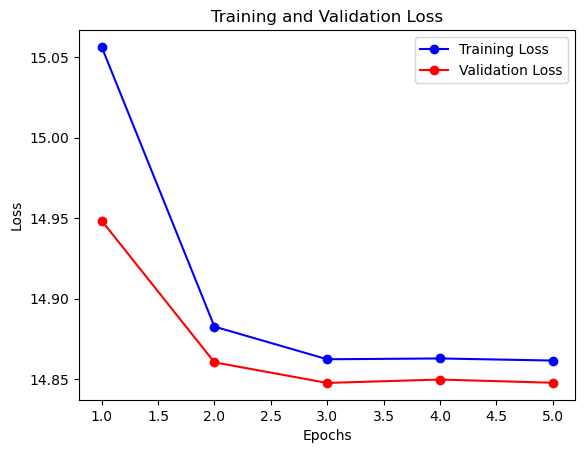

In [17]:
import matplotlib.pyplot as plt

# Loss and validation loss from the given epochs
loss = [15.0564, 14.8826, 14.8623, 14.8628, 14.8615]
val_loss = [14.9484, 14.8604, 14.8476, 14.8497, 14.8477]

# Plotting
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [113]:
# Evaluate the model on the test set
predictions = model_gnn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions.flatten()))
print(f'Test RMSE: {rmse}')



7187/7187 [==============================] - 5s 732us/step
Test RMSE: 3.359471340596498


In [114]:
# Save the trained model
model_gnn.save('gnn_model_trained.h5')


In [115]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluate the GNN model on the test set
predictions = model_gnn.predict(X_test)

# Convert predictions to binary ratings (e.g., threshold at 2.5 for positive/negative)
binary_predictions = (predictions.flatten() >= 2.5).astype(int)
binary_true_labels = (y_test >= 2.5).astype(int)

# Calculate accuracy, recall, precision, and F1 score
accuracy = accuracy_score(binary_true_labels, binary_predictions)
recall = recall_score(binary_true_labels, binary_predictions)
precision = precision_score(binary_true_labels, binary_predictions)
f1 = f1_score(binary_true_labels, binary_predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1 Score: {f1:.4f}')


7187/7187 [==============================] - 5s 732us/step
Accuracy: 0.6949
Recall: 0.7854
Precision: 0.5657
F1 Score: 0.6576


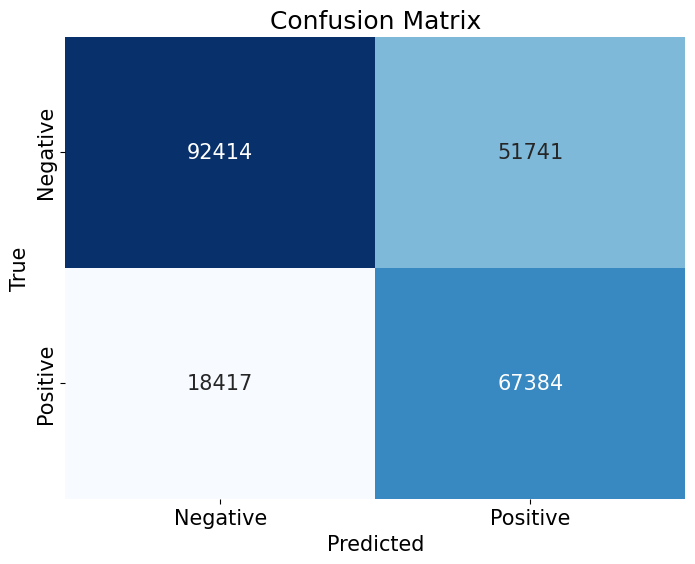

In [116]:
!pip install seaborn matplotlib
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(binary_true_labels, binary_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

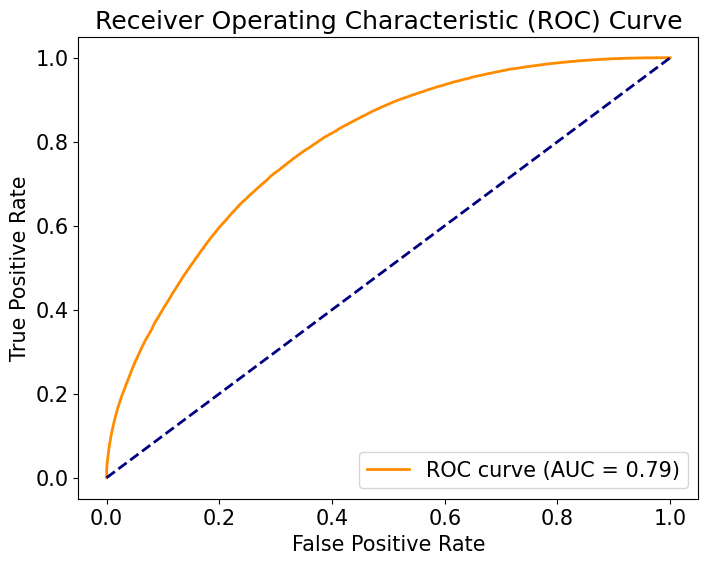

In [117]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(binary_true_labels, predictions.flatten())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


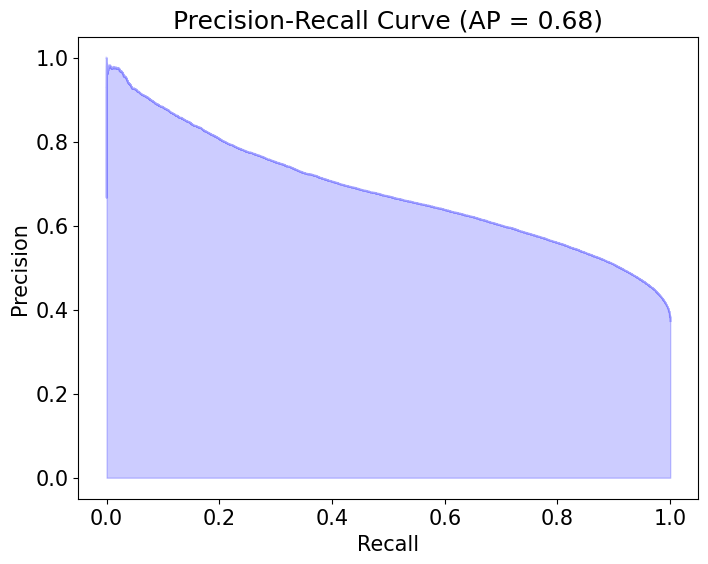

In [118]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall curve and area
precision, recall, _ = precision_recall_curve(binary_true_labels, predictions.flatten())
average_precision = average_precision_score(binary_true_labels, predictions.flatten())

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.show()
